In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

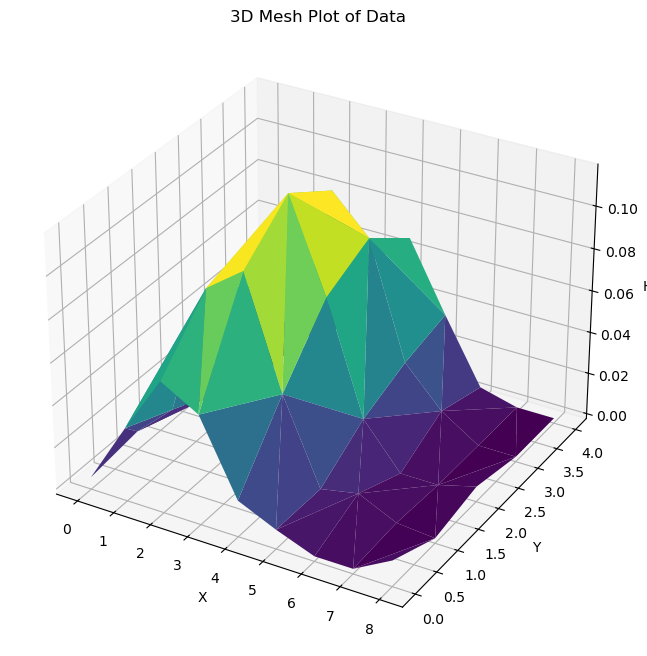

In [31]:
# Load the CSV file
file_path = "data/fuzzedGaussian.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure the data satisfies the bounds
max_x, max_y, max_h = 8, 4, 0.2  # Define your max values
data = data[(data["X"] <= max_x) & (data["Y"] <= max_y) & (data["H"] <= max_h)]

# Create a 3D mesh plot for visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(data["X"], data["Y"], data["H"], cmap="viridis", edgecolor="none")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("H")
plt.title("3D Mesh Plot of Data")
plt.show()

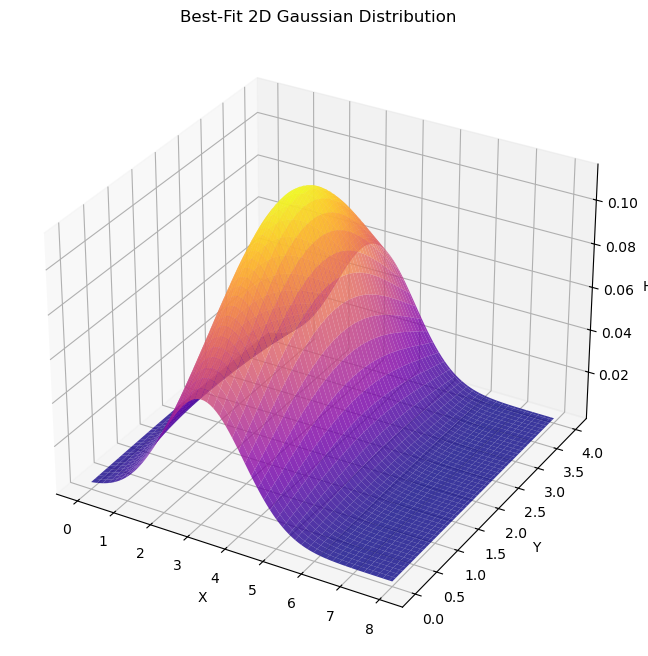

In [33]:
# Define a 2D Gaussian function
def gaussian_2d(XY, a, x0, y0, sigma_x, sigma_y):
    x, y = XY
    return a * np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))

# Fit data to the 2D Gaussian
x = data["X"].values
y = data["Y"].values
h = data["H"].values
initial_guess = (np.max(h), np.mean(x), np.mean(y), np.std(x), np.std(y))
params, _ = curve_fit(gaussian_2d, (x, y), h, p0=initial_guess)

# Generate a fine mesh for the Gaussian
x_mesh = np.linspace(0, max_x, 100)
y_mesh = np.linspace(0, max_y, 100)
x_grid, y_grid = np.meshgrid(x_mesh, y_mesh)
h_fit = gaussian_2d((x_grid.ravel(), y_grid.ravel()), *params).reshape(x_grid.shape)

# Create a 3D plot of the best-fit Gaussian
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, h_fit, cmap="plasma", edgecolor="none", alpha=0.8)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("H")
plt.title("Best-Fit 2D Gaussian Distribution")
plt.show()